In [41]:
import re
import os

MULTIPLIERS = [0.5,1,2, 4, 8]

def get_file_directory(cache_level):
    dirs = []
    for i in MULTIPLIERS:
        dirs.append(os.getcwd()+f"/{cache_level}_{i}/")
    return dirs

files = ["bfs-3.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt",
"cc-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt",
"sssp-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"
]

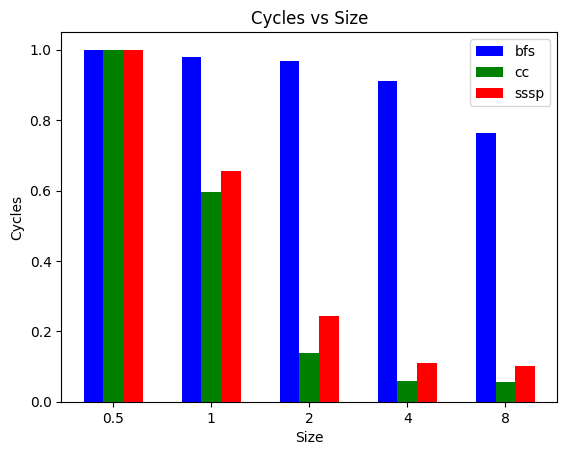

In [52]:
import numpy as np
import matplotlib.pyplot as plt
pattern ={
    'cycles': r'CPU 0 cumulative IPC: [0-9.]* instructions: [0-9]* cycles: ([0-9]*)',
    # patterns for:
    # - IPC
    # - L1D, L2C, LLC miss rates (total)
    # - L1D, L2C, LLC miss rates (load)
    # - L1D, L2C, LLC miss rates (prefetch)
    # - L1D, L2C, LLC miss latency
    'l1' : r'L1D TOTAL .* ([0-9]*)',
    'l2' : r'L2C TOTAL .* ([0-9]*)',
    # 'llc' : r'LLC TOTAL     ACCESS:   [0-9]*  HIT:    [0-9]*  MISS:    ([0-9]*)',
    # 'llc' : r'LLC TOTAL     ACCESS:    [0-9]*  HIT:     [0-9]*  MISS:    ([0-9]*)',
    'llc' : r'LLC TOTAL .* ([0-9]*)$',
}

x  = np.arange(5)
data = [str(i) for i in MULTIPLIERS]
bfs_data = np.array([])
cc_data = np.array([])
sssp_data = np.array([])

def get_data(file,key):
    # res=dict()
    with open(file, "r") as f:
        for line in f:
            # for key in pattern:
            match = re.search(pattern[key], line)
            if match:
                # res[key] = match.group(1)
                res = match.group(1)
                return int(res)
    # if not len(res):
    #     return None
    
    return None 

# print(get_data(get_file_directory("l1")[0]+files[0]))
def parse_data(level,key):
    global bfs_data
    global cc_data
    global sssp_data
    # for level in ['l1']:

    for i in range(len(files)):
        for dir in get_file_directory(level):
            # if(file == "bfs-3.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"):
            #     bfs_data = np.append(bfs_data, get_data(dir+file))
            # elif(file == "cc-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"):
            #     cc_data = np.append(cc_data, get_data(dir+file))
            # elif(file == "sssp_data-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"):
            #     sssp_data = np.append(sssp_data, get_data(dir+file))
            if(i == 0):
                bfs_data = np.append(bfs_data, get_data(dir+files[0],key))
            elif(i == 1): 
                cc_data = np.append(cc_data, get_data(dir+files[1],key))
            elif(i == 2):
                sssp_data = np.append(sssp_data, get_data(dir+files[2],key))
             

# parse_data("l1","l1")
parse_data("llc","llc")
# parse_data("l1","cycles")

# parse_data("l2","l2")
def plot_cycle(bfs_cycle_data, cc_cycle_data, sssp_cycle_data):
    bar_width = 0.2
    bfs_cycle_data = bfs_cycle_data/np.max(bfs_cycle_data)
    cc_cycle_data = cc_cycle_data/np.max(cc_cycle_data)
    sssp_cycle_data = sssp_cycle_data/np.max(sssp_cycle_data)
    plt.bar(x-bar_width, bfs_cycle_data, width=bar_width, color='b', label='bfs')            
    plt.bar(x, cc_cycle_data, width=bar_width, color='g', label='cc')
    plt.bar(x+bar_width, sssp_cycle_data, width=bar_width, color='r',  label='sssp')

    plt.xlabel("Size")
    plt.ylabel("Cycles")
    plt.title("Cycles vs Size")
    plt.xticks(x, data)
    plt.legend()
    # plt.yscale("log")
    plt.show()

plot_cycle(bfs_data, cc_data, sssp_data)